In [2]:
rdd=sc.parallelize(range(100))
sum=rdd.sum()
n=rdd.count()
mean=sum/n
print (mean)

49.5


In [3]:
rdd.sortBy(lambda x:x).zipWithIndex().map(lambda a_b:(a_b[1],a_b[0]))


PythonRDD[10] at RDD at PythonRDD.scala:53

In [42]:
from math import sqrt
std=sqrt(rdd.map(lambda x:pow(x-mean,2)).sum()/n)
print(std)

157.78909975026792


In [53]:
# calculating Kurtosis
from math import sqrt
rdd2=sc.parallelize([34,1,23,4,3,3,12,4,3,1])
sum=rdd2.sum()
mean=sum/rdd2.count()
std=sqrt(rdd1.map(lambda x: pow(x-mean,2)).sum()/n)
k=rdd2.map(lambda x: pow(x-mean,4)/pow (std,4)).sum()/n
print(k)
skew=rdd2.map(lambda x: pow(x-mean,3)/pow (std,3)).sum()/n
print(skew)

#34,1,23,4,3,3,12,4,3,1

3.663124005193276
1.4549069329914


In [38]:
# if we have to apply a function to all the elements of a list use the map function
from math import sqrt
rdd1=sc.parallelize([34,1,23,4,3,3,12,4,3,1])
# rdd1=sc.parallelize([1,2,4,5,34,1,32,4,34,2,1,3])
sum=rdd1.sum()
n=rdd1.count()
mean=sum/n
print(f"mean:{mean}")
print(sqrt(rdd1.map(lambda x: pow(x-mean,2)).sum()/n))
print("this is the standard deviation of the list range(100)")


mean:8.8
10.562196741208714
this is the standard deviation of the list range(100)


In [47]:
#calculating covariance matrix for two vectors
rddx=sc.parallelize(range(100))
rddy=sc.parallelize(range(100))
meanx=rddx.sum()/rddx.count()
meany=rddy.sum()/rddy.count()
# the euation for calculating the covariance requires access to both the rdds. we will zip them together
rddXY=rddx.zip(rddy)
rddXY.take(10)
xy=rddXY
print(xy)

org.apache.spark.api.java.JavaPairRDD@62a8ab8d


In [25]:

covXY= rddXY.map(lambda x__y: (x__y[0]-meanx)*(x__y[1]-meany)).sum()/float(rddXY.count())
covXY

833.25

In [30]:
# we got a value for covariance, which is good. But we need values between +1 and -1. to get this value which we will call corellation. We can get the value by 
#deviding the covariance by the product of standard deviation for x and y
from math import sqrt
stdx=sqrt(rddx.map(lambda x: pow (x-meanx,2)).sum()/rddx.count())
print(stdx)
stdy=sqrt(rddy.map(lambda x: pow (x-meany,2)).sum()/rddx.count())
print(stdy)

28.86607004772212
28.86607004772212


In [31]:
corrXY=covXY/(stdx*stdy)
corrXY

1.0

In [43]:
#Lets  reverse the second list and see if the corellation changes
rddx=sc.parallelize(random.sample(range(100),100)
meanx=rddx.sum()/rddx.count()
rddy=sc.parallelize(reversed(range(100)))
rddy.take(10)
meany=rddy.sum()/rddy.count()
rddXY=rddx.zip(rddy)
covXY= rddXY.map(lambda x__y: (x__y[0]-meanx)*(x__y[1]-meany)).sum()/float(rddXY.count())
covXY 
stdx=sqrt(rddx.map(lambda x: pow(x-meanx,2)).sum()/rddXY.count())
stdx
stdy=sqrt(rddy.map(lambda x: pow(x-meany,2)).sum()/rddXY.count())

In [59]:
corrXY=covXY/(stdx*stdy)
    
corrXY
# See, this time we got a corelation value of -1, as we had reversed the second list




-1.0

In [6]:
# lets find the corellation between two random lists, which mean there will be no or very less corellation, the correlation value will be close to zero
#God help me with the tab issue

# rddy=sc.parallelize(random.sample(range(100),100))
# rddx=sc.parallelize(random.sample(range(100),100)
rddx=sc.parallelize([1,2,3,4,5,6,7,8,9,10])
rddy=sc.parallelize([7,6,5,4,5,6,7,8,9,10])
meanx=rddx.sum()/rddx.count()                    
meany=rddy.sum()/rddy.count()
rddXY=rddx.zip(rddy)
covXY=rddXY.map(lambda x__y: (x__y[0]-meanx)*(x__y[1]-meany)).sum()/rddXY.count()
print(f"the cov value is: {covXY}")

from pyspark.mllib.stat import Statistics

corr=Statistics.corr(rddXY)
corr

the cov value is: 3.65


array([[1.        , 0.70927291],
       [0.70927291, 1.        ]])

In [127]:
# lets see how correlation matrix works for multiple columns
import random
from pyspark.mllib.stat import Statistics
column1=sc.parallelize(range(100))
column2=sc.parallelize(range(100,200))
column3=sc.parallelize(list(reversed(range(100))))
column4=sc.parallelize(random.sample(range(100),100))
data=column1
data.take(10)
# lets get the nested touple structure by zipping as earlier
data=column1.zip(column2).zip(column3).zip(column4)
# print(data.take(10)) # this gives out a nested touple , we need to unpack it now using map

data1=data.map(lambda a__b:(a__b[0][0][0],a__b[0][0][1],a__b[0][1],a__b[1]))

print(data1.take(10))

#This unpacking of tuple was a frusteting job, just do not forget it again
                    
                    



[(0, 100, 99, 92), (1, 101, 98, 31), (2, 102, 97, 48), (3, 103, 96, 52), (4, 104, 95, 26), (5, 105, 94, 93), (6, 106, 93, 50), (7, 107, 92, 14), (8, 108, 91, 12), (9, 109, 90, 24)]


In [130]:
Statistics.corr(data1)


array([[ 1.        ,  1.        , -1.        ,  0.01113711],
       [ 1.        ,  1.        , -1.        ,  0.01113711],
       [-1.        , -1.        ,  1.        , -0.01113711],
       [ 0.01113711,  0.01113711, -0.01113711,  1.        ]])

In [5]:


!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true washing.parquet



--2020-06-23 17:19:28--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true [following]
--2020-06-23 17:19:28--  https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet [following]
--2020-06-23 17:19:29--  https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/skillsnetwork/master/coursera_ds/washing.parquet [fo

In [6]:
df = spark.read.parquet('washing.parquet')
df.createOrReplaceTempView('washing')
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [24]:
print(type(df))
print(type(washing))

<class 'pyspark.sql.dataframe.DataFrame'>


NameError: name 'washing' is not defined

In [41]:
result1 = spark.sql("select voltage from washing where voltage is not null")
result1.take(10)

[Row(voltage=236),
 Row(voltage=235),
 Row(voltage=228),
 Row(voltage=236),
 Row(voltage=233),
 Row(voltage=226),
 Row(voltage=235),
 Row(voltage=220),
 Row(voltage=225),
 Row(voltage=239)]

In [42]:
result1_array=result.rdd.map(lambda row:row.voltage).sample(False,0.1).collect()
print(result1_array,end=" ")
print(result1.count())

[239, 233, 237, 238, 238, 225, 234, 221, 238, 222, 237, 220, 234, 222, 221, 251, 236, 239, 224, 230, 231, 223, 228, 232, 221, 235, 229, 222, 239, 229, 240, 230, 223, 229, 233, 227, 220, 230, 226, 232, 227, 226, 232, 234, 228, 225, 232] 448


In [43]:
%matplotlib inline

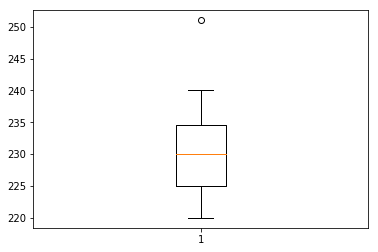

In [44]:
import matplotlib.pyplot as plt
plt.boxplot(result1_array)
plt.show()

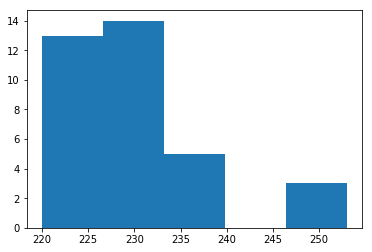

In [45]:
plt.hist(result_array,bins=5)
plt.show()

In [61]:
result2 = spark.sql("select voltage,ts from washing where voltage is not null order by ts asc")
result2.take(10)
print(type(result2))

<class 'pyspark.sql.dataframe.DataFrame'>


In [63]:
result2_processed=result2.rdd.sample(False,0.1).map(lambda row: (row.voltage,row.ts))
#This will return a list of tuples 
# result2_processed=result2.rdd.sample(False,0.1).map(lambda row: (row.voltage,row.ts)).collect()
#once we perform the action collect, the rdd is translated into a differnet form.

In [67]:
#now we will create two seperate column voltage and time so that we can plot them in two axis
temperature = result2_processed.map(lambda ts_voltage:ts_voltage[0]).collect()
time=result2_processed.map(lambda ts_voltage:ts_voltage[1]).collect()
print(time)

[1547808734922, 1547808806965, 1547808852031, 1547808891076, 1547808933120, 1547808945126, 1547808957136, 1547808990168, 1547809002173, 1547809008177, 1547809056219, 1547809074227, 1547809155272, 1547809209328, 1547809221335, 1547809251354, 1547809308395, 1547809323400, 1547809359413, 1547809371425, 1547809392440, 1547809416460, 1547809428466, 1547809467488, 1547809485502, 1547809518524, 1547809575562, 1547809587575, 1547809608585, 1547809611586, 1547809656609, 1547809773702, 1547809797716, 1547809839737, 1547809860746, 1547809866750, 1547809872751, 1547809890764, 1547810034821, 1547810043826, 1547810052830]


TypeError: 'str' object is not callable

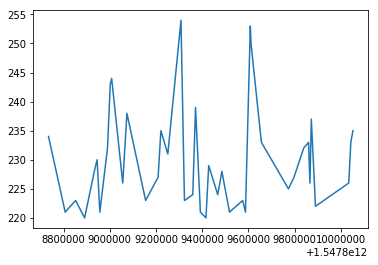

In [71]:
#Now lets plot the runchart with time on x axis and voltage on y axis
#actually we made a mistake, we are plotting it as temperature but actually its the voltage
plt.plot(time,temperature)
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()

In [74]:
scatterplot_data=spark.sql("select hardness, flowrate, temperature from washing where hardness is not null and temperature is not null and flowrate is not null")
print(type(scatterplot_data))
scatterplot_data.take(10)

<class 'pyspark.sql.dataframe.DataFrame'>


[Row(hardness=77, flowrate=11, temperature=100),
 Row(hardness=75, flowrate=11, temperature=86),
 Row(hardness=73, flowrate=11, temperature=84),
 Row(hardness=79, flowrate=11, temperature=84),
 Row(hardness=72, flowrate=11, temperature=96),
 Row(hardness=73, flowrate=11, temperature=88),
 Row(hardness=77, flowrate=11, temperature=87),
 Row(hardness=79, flowrate=11, temperature=96),
 Row(hardness=73, flowrate=11, temperature=90),
 Row(hardness=77, flowrate=11, temperature=88)]

In [79]:
scatter_hardness=scatterplot_data.rdd.map(lambda a_b:a_b[0]).collect()
scatter_flowrate=scatterplot_data.rdd.map(lambda a_b:a_b[1]).collect()
scatter_temperature=scatterplot_data.rdd.map(lambda a_b:a_b[2]).collect()
print(scatter_hardness[0:5])
print(scatter_flowrate[0:5])

[77, 75, 73, 79, 72]
[11, 11, 11, 11, 11]


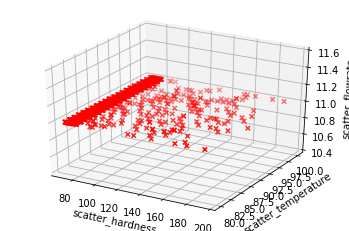

In [87]:
# from mpl_toolkits.mplot3d import Axes3d
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(scatter_hardness,scatter_temperature,scatter_flowrate,c = 'r', marker = 'x')
ax.set_xlabel('scatter_hardness')
ax.set_ylabel('scatter_temperature')
ax.set_zlabel('scatter_flowrate')
plt.show()

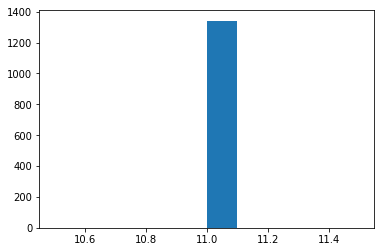

In [90]:
#now histogram
plt.hist(scatter_flowrate)
plt.show()

In [10]:
#Now we want to reduce the dimension of the dataset to 3 so that we can plot it.
#flowrate|frequency|hardness|speed|temperature| ts|voltage
data=spark.sql("""
SELECT * from (SELECT min(flowrate) over w as min_flowrate,max(flowrate) over w as max_flowrate,

min(frequency) over w as min_frequency, max(frequency) over w as max_frequency,

min(hardness) over w as min_hardness, max(hardness) over w as max_hardness,
min(speed) over w as min_speed, max(speed) over w as max_speed,
min(temperature) over w as min_temperature, max(temperature) over w as max_temperature,
min(voltage) over w as min_voltage, max(voltage) over w as max_voltage from washing WINDOW w as 
(order by ts ROWS BETWEEN CURRENT ROW AND 10 FOLLOWING)) 
WHERE min_flowrate is NOT NULL and max_flowrate is not null 
and min_frequency is not null and max_frequency is not null
and min_hardness is not null and max_hardness is not null
and min_speed is not null and max_speed is not null
and min_temperature is not null and max_temperature is not null
and min_voltage is not null and max_voltage is not null
""")

In [11]:
print(data.take(10))
data.count()

[Row(min_flowrate=11, max_flowrate=11, min_frequency=68, max_frequency=76, min_hardness=71, max_hardness=78, min_speed=1033, max_speed=1033, min_temperature=81, max_temperature=100, min_voltage=221, max_voltage=223), Row(min_flowrate=11, max_flowrate=11, min_frequency=68, max_frequency=76, min_hardness=72, max_hardness=78, min_speed=1033, max_speed=1033, min_temperature=81, max_temperature=100, min_voltage=221, max_voltage=223), Row(min_flowrate=11, max_flowrate=11, min_frequency=68, max_frequency=76, min_hardness=72, max_hardness=80, min_speed=1033, max_speed=1033, min_temperature=81, max_temperature=100, min_voltage=221, max_voltage=223), Row(min_flowrate=11, max_flowrate=11, min_frequency=68, max_frequency=74, min_hardness=72, max_hardness=80, min_speed=1033, max_speed=1046, min_temperature=81, max_temperature=100, min_voltage=222, max_voltage=223), Row(min_flowrate=11, max_flowrate=11, min_frequency=68, max_frequency=74, min_hardness=73, max_hardness=80, min_speed=1033, max_speed=1

2051

In [14]:
#our goal is to reduce these features to 3 so that we can plot them and find some patterns or cluster
#lets import some libraries
from pyspark.ml.feature import PCA # will perform principal component ananlysis
from pyspark.ml.linalg import Vectors # will convert RDD into vectors, as PCA only takes vectors or numpy arrays
from pyspark.ml.feature import VectorAssembler # outputs a dense vector with all the feature values in one dense row

In [16]:
print(data.columns)
print(type(data))

['min_flowrate', 'max_flowrate', 'min_frequency', 'max_frequency', 'min_hardness', 'max_hardness', 'min_speed', 'max_speed', 'min_temperature', 'max_temperature', 'min_voltage', 'max_voltage']
<class 'pyspark.sql.dataframe.DataFrame'>


In [30]:
assembler = VectorAssembler(inputCols = data.columns, outputCol = 'features') # note when the inputCols, the output is outputCol, why, because it 
#outputs only one column
features = assembler.transform(data)
print(features.rdd.take(2))
features.rdd.map(lambda r:r.features).take(10)
features.count()

[Row(min_flowrate=11, max_flowrate=11, min_frequency=68, max_frequency=76, min_hardness=71, max_hardness=78, min_speed=1033, max_speed=1033, min_temperature=81, max_temperature=100, min_voltage=221, max_voltage=223, features=DenseVector([11.0, 11.0, 68.0, 76.0, 71.0, 78.0, 1033.0, 1033.0, 81.0, 100.0, 221.0, 223.0])), Row(min_flowrate=11, max_flowrate=11, min_frequency=68, max_frequency=76, min_hardness=72, max_hardness=78, min_speed=1033, max_speed=1033, min_temperature=81, max_temperature=100, min_voltage=221, max_voltage=223, features=DenseVector([11.0, 11.0, 68.0, 76.0, 72.0, 78.0, 1033.0, 1033.0, 81.0, 100.0, 221.0, 223.0]))]


2051

In [26]:
#now initializing a PCA instance
pca = PCA(k=3, inputCol = 'features',outputCol = 'pcafeatures')
model = pca.fit(features)


In [33]:
features_pca=model.transform(features)
features_pca.rdd.take(10) # the transformed features_pca has both part the original data and the reduced data (pcaffeatures).
#lets only get the pcafeatures
features_pca=model.transform(features).select('pcafeatures')
features_pca.show(truncate = False) # show() only shows 20 rows bydefault


+----------------------------------------------------------+
|pcafeatures                                               |
+----------------------------------------------------------+
|[1459.9789705814205,18.745237781783985,70.78430794797085] |
|[1459.9954818286778,19.11343146165578,70.72738871426198]  |
|[1460.0895843561298,20.96947106292599,70.75630600322263]  |
|[1469.699392941955,20.403124647618565,62.01356967488302]  |
|[1469.7159041892126,20.77131832749036,61.956650441174155] |
|[1469.7128317338722,20.790751117225508,61.89610667833301] |
|[1478.3530264572944,20.29455702973184,71.67550104809892]  |
|[1478.3530264572944,20.29455702973184,71.67550104809892]  |
|[1478.3686036138186,20.260626897639433,71.63355353606711] |
|[1478.3686036138186,20.260626897639433,71.63355353606711] |
|[1483.5412027684106,20.006222577504445,66.82710394284489] |
|[1483.517109022337,20.867020421586844,66.86707301954364]  |
|[1483.4224268542946,19.87574823665815,66.93027077914208]  |
|[1483.4224268542946,19.

In [34]:
# lets plot the dataset

features_pca.count() # we now have the same no of rows

2051

In [36]:
#lets plot the data. features_pca is a dense vector, dense vector object can be indexed

x = features_pca.rdd.map(lambda x : x.pcafeatures).map(lambda x: x[0]).collect()

y = features_pca.rdd.map(lambda x: x.pcafeatures).map(lambda x : x[1]).collect()

z = features_pca.rdd.map(lambda x: x.pcafeatures).map(lambda x : x[2]).collect()



In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

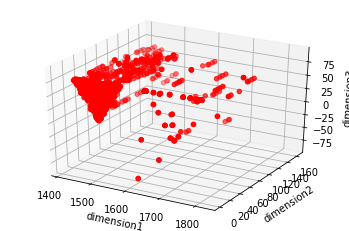

In [40]:
fig = plt.figure()

ax = plt.subplot(111, projection = "3d")

ax.scatter(x,y,z, c = 'r', marker = 'o')

ax.set_xlabel("dimension1")

ax.set_ylabel("dimension2")

ax.set_zlabel("dimension3")

plt.show()

In [3]:
!pip install systemml

    100% |████████████████████████████████| 9.7MB 1.1MB/s eta 0:00:01
    100% |████████████████████████████████| 14.6MB 941kB/s eta 0:00:01
    100% |████████████████████████████████| 25.9MB 770kB/s eta 0:00:01
    100% |████████████████████████████████| 10.1MB 499kB/s eta 0:00:01
    100% |████████████████████████████████| 6.9MB 1.8MB/s eta 0:00:01
    100% |████████████████████████████████| 2.1MB 3.0MB/s eta 0:00:01
    100% |████████████████████████████████| 235kB 4.1MB/s eta 0:00:01
    100% |████████████████████████████████| 512kB 4.4MB/s eta 0:00:01
    100% |████████████████████████████████| 307kB 6.1MB/s eta 0:00:01
  Stored in directory: /home/spark/shared/.cache/pip/wheels/cf/07/79/b3ed6f12afe06b2ab55d60dcfd62e66240f5d8c6088a518177
Successfully built systemml
tensorflow 1.13.1 requires tensorboard<1.14.0,>=1.13.0, which is not installed.
pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which i

In [4]:
!pip show systemml

Name: systemml
Version: 1.2.0
Summary: Apache SystemML is a distributed and declarative machine learning platform.
Home-page: http://systemml.apache.org/
Author: Apache SystemML
Author-email: dev@systemml.apache.org
License: Apache 2.0
Location: /home/spark/shared/user-libs/python3.6
Requires: scikit-learn, pandas, numpy, Pillow, scipy
Required-by: 


In [7]:
from systemml import MLContext, dml
#create MLContext object
ml=MLContext(sc)
print(ml.info())

Archiver-Version: Plexus Archiver
Artifact-Id: systemml
Build-Jdk: 1.8.0_121
Build-Time: 2017-04-19 21:45:10 UTC
Built-By: asurve
Created-By: Apache Maven 3.3.9
Group-Id: org.apache.systemml
Main-Class: org.apache.sysml.api.DMLScript
Manifest-Version: 1.0
Minimum-Recommended-Spark-Version: 2.1.0
Version: 0.14.0-incubating



In [10]:
import sys, os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
plt.switch_backend('agg')
%matplotlib inline

In [23]:
diabetes = datasets.load_diabetes()
print(type(diabetes))
print(diabetes.feature_names)
diabetes.data

<class 'sklearn.utils.Bunch'>
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [12]:
import numpy as np
a= np.array([[1,2,3,4],[1,2]])
print(a.size
     )

2
